# 使用sklearn做单机特征工程

原博客：https://www.cnblogs.com/jasonfreak/p/5448385.html

参考博客：https://www.jianshu.com/p/516f009c0875

这篇博客写的太好了，照着原博客的练习。

## Iris数据集

In [1]:
from sklearn.datasets import load_iris

#导入IRIS数据集
iris = load_iris()

### 特征矩阵

In [2]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
#特征矩阵
iris.data.shape

(150, 4)

### Label向量

In [4]:
iris.target[45:55]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [5]:
#目标向量
iris.target.shape

(150,)

### 数据集说明

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 预处理

### 特征缩放

#### 标准化

In [8]:
from sklearn.preprocessing import StandardScaler
 
 #标准化，返回值为标准化后的数据
data=StandardScaler().fit_transform(iris.data)
data[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

#### min_max缩放

In [9]:
from sklearn.preprocessing import MinMaxScaler
 
#区间缩放，返回值为缩放到[0, 1]区间的数据
data = MinMaxScaler().fit_transform(iris.data)
data[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

#### 归一化

In [10]:
from sklearn.preprocessing import Normalizer

"""简单来说，标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，
将样本的特征值转换到同一量纲下。归一化是依照特征矩阵的行处理数据，
其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，
也就是说都转化为“单位向量”。"""

#归一化，返回值为归一化后的数据
data = Normalizer().fit_transform(iris.data)
data[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

### 处理categorical特征

#### 二值化

In [11]:
from sklearn.preprocessing import Binarizer

#二值化，阈值设置为3，返回值为二值化后的数据
data = Binarizer(threshold=3).fit_transform(iris.data)
data[:5]

array([[1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.]])

#### one-hot编码

In [12]:
from sklearn.preprocessing import OneHotEncoder

#哑编码，对IRIS数据集的目标值，返回值为哑编码后的数据
data = OneHotEncoder().fit_transform(iris.target.reshape((-1,1)))
data[:5]

<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [13]:
data[45:55].todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

此外还有
* LabelEncoder ：把字符串类型的数据转化为整型
* MultiLabelBinarizer：多标签二值化

### 缺失值填充

In [14]:
from numpy import vstack, array, nan
from sklearn.preprocessing import Imputer

# 由于IRIS数据集没有缺失值，故对数据集新增一个样本，4个特征均赋值为NaN，表示数据缺失。
#缺失值计算，返回值为计算缺失值后的数据
#参数missing_value为缺失值的表示形式，默认为NaN
#参数strategy为缺失值填充方式，默认为mean（均值）
data = Imputer().fit_transform(vstack((array([nan, nan, nan, nan]), iris.data)))
data[:5] # 第一条就是含有缺失值的样本

array([[5.84333333, 3.054     , 3.75866667, 1.19866667],
       [5.1       , 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.2       ],
       [4.7       , 3.2       , 1.3       , 0.2       ],
       [4.6       , 3.1       , 1.5       , 0.2       ]])

### 数据变换

#### 多项式变换

degree=2的多项式变换$(1,x_1,x_2,x_3,x_4, x_1^2, x_1x_2,x_1x_3,x_1x_4, x_2^2, x_2x_3, x_2x_4, x_3^2， x_3x_4, x_4^2)$

In [15]:
from sklearn.preprocessing import PolynomialFeatures

#多项式转换
#参数degree为度，默认值为2
data = PolynomialFeatures().fit_transform(iris.data)
data[:5]

array([[ 1.  ,  5.1 ,  3.5 ,  1.4 ,  0.2 , 26.01, 17.85,  7.14,  1.02,
        12.25,  4.9 ,  0.7 ,  1.96,  0.28,  0.04],
       [ 1.  ,  4.9 ,  3.  ,  1.4 ,  0.2 , 24.01, 14.7 ,  6.86,  0.98,
         9.  ,  4.2 ,  0.6 ,  1.96,  0.28,  0.04],
       [ 1.  ,  4.7 ,  3.2 ,  1.3 ,  0.2 , 22.09, 15.04,  6.11,  0.94,
        10.24,  4.16,  0.64,  1.69,  0.26,  0.04],
       [ 1.  ,  4.6 ,  3.1 ,  1.5 ,  0.2 , 21.16, 14.26,  6.9 ,  0.92,
         9.61,  4.65,  0.62,  2.25,  0.3 ,  0.04],
       [ 1.  ,  5.  ,  3.6 ,  1.4 ,  0.2 , 25.  , 18.  ,  7.  ,  1.  ,
        12.96,  5.04,  0.72,  1.96,  0.28,  0.04]])

#### 对数变换

In [16]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer

# 基于单变元函数的数据变换可以使用一个统一的方式完成
#自定义转换函数为对数函数的数据变换 
#第一个参数是单变元函数
data = FunctionTransformer(log1p).fit_transform(iris.data)
data[:5]

array([[1.80828877, 1.5040774 , 0.87546874, 0.18232156],
       [1.77495235, 1.38629436, 0.87546874, 0.18232156],
       [1.74046617, 1.43508453, 0.83290912, 0.18232156],
       [1.7227666 , 1.41098697, 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156]])

### 特征抽取

sklearn.feature_extraction中包含有针对特定领域的一些特征抽取技术。

* DictVectorizer： 将dict类型的list数据，转换成numpy array
* FeatureHasher ： 特征哈希，相当于一种降维技巧
* image：图像相关的特征抽取
* text： 文本相关的特征抽取
* text.CountVectorizer：将文本转换为每个词出现的个数的向量
* text.TfidfVectorizer：将文本转换为tfidf值的向量
* text.HashingVectorizer：文本的特征哈希

## 特征选择

为什么要特征选择？
1. 过多的特征会提高模型的复杂度，带来维度灾难
1. 一些不相关的特征相当于噪声。
1. 增加模型的可读性

通常来说，从两个方面考虑来选择特征：
* 特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。
* 特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择。除方差法外，本文介绍的其他方法均从相关性考虑。

具体而言，单变量特征选择的原理是分别单独的计算每个变量的某个统计指标，根据该指标来判断哪些指标重要，剔除那些不重要的指标。https://www.cnblogs.com/stevenlk/p/6543628.html

1. 对于分类问题(y离散)，可采用：
卡方检验，f_classif, mutual_info_classif，互信息
1. 对于回归问题(y连续)，可采用：
皮尔森相关系数，f_regression, mutual_info_regression，最大信息系数
　　
  
根据特征选择的形式又可以将特征选择方法分为3种：
1. Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
1. Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
1. Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。
　　
  
我们使用sklearn中的feature_selection库来进行特征选择。
* SelectKBest 移除得分前 k 名以外的所有特征(取top k)
* SelectPercentile 移除得分在用户指定百分比以后的特征(取top k%)
* 对每个特征使用通用的单变量统计检验： 假正率(false positive rate) SelectFpr, 伪发现率(false discovery rate) SelectFdr, 或族系误差率 SelectFwe.
* GenericUnivariateSelect 可以设置不同的策略来进行单变量特征选择。同时不同的选择策略也能够使用超参数寻优，从而让我们找到最佳的单变量特征选择策略。

>　　The methods based on F-test estimate the degree of linear dependency between two random variables. (F检验用于评估两个随机变量的线性相关性)On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.(另一方面，互信息的方法可以捕获任何类型的统计依赖关系，但是作为一个非参数方法，估计准确需要更多的样本)

> Feature selection with sparse data: If you use sparse data (i.e. data represented as sparse matrices), chi2, mutual_info_regression, mutual_info_classif will deal with the data without making it dense.(如果你使用稀疏数据(比如，使用稀疏矩阵表示的数据), 卡方检验(chi2)、互信息回归(mutual_info_regression)、互信息分类(mutual_info_classif)在处理数据时可保持其稀疏性.)

### Filter

#### 方差选择法

使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征，删除特征值的方差达不到最低标准的特征。

In [17]:
from sklearn.feature_selection import VarianceThreshold

#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
data = VarianceThreshold(threshold=0.3).fit_transform(iris.data)

In [18]:
data[:5] # 从四列变为三列

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

#### 相关系数法

使用相关系数法，先要计算各个特征对目标值的相关系数以及相关系数的P值。
这里使用的是Pearson相关系数。

> Pearson相关系数是用来检测两个数据之间是否线性不相关。$\mathcal{H}_0$:两者之间线性不相关。
>如果p值< $\alpha$($\alpha$一般取0.05),说明小概率事件发生了，拒绝$\mathcal{H}_0$，接受$\mathcal{H}_1$，认为两者之间有线性关系，且其相关程度由相关系数决定。

> 这里的$\alpha$叫显著性水平，在假设检验中，是第一类错误的比例。也就是说，显著性检验只限制了第一类错误，不管第二类错误。当p值 < $\alpha$, 拒绝$\mathcal{H}_0$。

> 关于p值的含义，联系概率和统计中，正态总体下，$\mathcal{H}_0$算出的统计量符合某分布，如果样本组成的统计量比较偏，落入分布中的两端（双边），那么认为这是小概率事件，而小概率事件不常发生。

> 假设检验的错误可以用混淆矩阵表示（联系分类问题的混淆矩阵）

In [19]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

# 选择K个最好的特征，返回选择特征后的数据
# 第一个参数为计算评估特征是否好的函数，该函数输入特征矩阵和目标向量，
# 输出array元组（评分，P值）
# 参数k为选择的特征个数
data = SelectKBest(lambda X, Y: tuple(array(list(map(lambda x: pearsonr(x, Y), X.T))).T), k=2) \
    .fit_transform(iris.data, iris.target)

def f(X, Y):
    ret = []
    # X：mxd, X^T: dxm
    for x in X.T:
        a, b = pearsonr(x, Y)
        ret.append([a, b])
    return array(ret).T[0], array(ret).T[1]


data = SelectKBest(f, k=2).fit_transform(iris.data, iris.target)
data[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

Pearson相关系数的一个明显缺陷是，作为特征排序机制，他只对线性关系敏感。如果关系是非线性的，即便两个变量具有一一对应的关系，Pearson相关性也可能会接近0。


Pearson相关系数计算速度快，这在处理大规模数据的时候很重要。

#### 卡方检验

有关卡方检测 https://www.cnblogs.com/HolyShine/p/6028601.html
https://blog.csdn.net/dta0502/article/details/82317969

* 卡方检验就是统计样本的实际观测值与理论推断值之间的偏离程度，实际观测值与理论推断值之间的偏离程度就决定卡方值的大小，如果卡方值越大，二者偏差程度越大；反之，二者偏差越小；若两个值完全相等时，卡方值就为0，表明理论值完全符合。

* 卡方检验是一种用途很广的计数资料的假设检验方法。它属于非参数检验的范畴，主要是比较两个及两个以上样本率( 构成比）以及两个分类变量的关联性分析。其根本思想就是在于比较理论频数和实际频数的吻合程度或拟合优度问题。


**卡方检验为什么能用来做特征选择？某特征可能导致label=1，但也有可能是因为样本误差导致。**

$\mathcal{H}_0$：某特征 与 label=1 无关

那么，该假设下，某特征的理论值可以通过计算该特征（具体直接看博客链接吧，没有例子，不太好叙述）。如果卡方值过大，p值较小，有较大概率拒绝$\mathcal{H}_0$，认为某特征和label有关。
从某种意义上来说，卡方越大，认为某特征和label越相关。

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
#选择K个最好的特征，返回选择特征后的数据
data = SelectKBest(chi2, k=2).fit_transform(iris.data, iris.target)
data[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

#### 互信息法

互信息为什么能做特征选择？

$I(X;Y)=H(X)+H(Y)-H(X,Y)$

如果X,Y不相关，那么联合熵等于X、Y的自信息之和；
如果相关，则联合熵小于X、Y的自信息之和；
而且相关程度越高，联合熵越小，互信息越大；

使用minepy库的mic方法，主要信息熵中的概率密度有点麻烦（win需要VC++ 14，先不装了）

##### 最大信息系数MIC

1、它不属于度量方式，也没有办法归一化，在不同数据及上的结果无法做比较；
2、对于连续变量的计算不是很方便（X和Y都是集合，x，y都是离散的取值），通常变量需要先离散化，而互信息的结果对离散化的方式很敏感。

最大信息系数MIC克服了这两个问题。它首先寻找一种最优的离散化方式，然后把互信息取值转换成一种度量方式，取值区间在[0，1]。 minepy 提供了MIC功能。

In [21]:
from sklearn.feature_selection import SelectKBest
from minepy import MINE

#由于MINE的设计不是函数式的，定义mic方法将其为函数式的，返回一个二元组，二元组的第2项设置成固定的P值0.5
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

#选择K个最好的特征，返回特征选择后的数据
SelectKBest(lambda X, Y: array(map(lambda x:mic(x, Y), X.T)).T, k=2).fit_transform(iris.data, iris.target)

ModuleNotFoundError: No module named 'minepy'

##### 互信息

In [22]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest


def f(X, Y):
    ret = []
    Y = Y.astype(float)
    # X：mxd, X^T: dxm
    for x in X.T:
        x = x.reshape(-1, 1) # input should be 2-d array
        mi = mutual_info_regression(x, Y)
        ret.append(mi[0])
    return array(ret)


data = SelectKBest(f, k=2).fit_transform(iris.data, iris.target)
data[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

#### 基于模型的特征排序 (Model based ranking)

　　这种方法的思路是直接使用你要用的机器学习算法，针对 每个单独的特征 和 响应变量建立预测模型。假如 特征 和 响应变量 之间的关系是非线性的，可以用基于树的方法(决策树、随机森林)、或者 扩展的线性模型 等。基于树的方法比较易于使用，因为他们对非线性关系的建模比较好，并且不需要太多的调试。但要注意过拟合问题，因此树的深度最好不要太大，再就是运用交叉验证。

In [27]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load boston housing dataset as an example
boston = load_boston()
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]

rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
# 单独采用每个特征进行建模，并进行交叉验证
for i in range(X.shape[1]):
    score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",  # 注意X[:, i]和X[:, i:i+1]的区别
                            cv=ShuffleSplit(len(X), 3, .3))
    scores.append((format(np.mean(score), '.3f'), names[i]))
print(sorted(scores, reverse=True))

D:\software\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[('0.643', 'LSTAT'), ('0.497', 'RM'), ('0.418', 'INDUS'), ('0.367', 'NOX'), ('0.341', 'TAX'), ('0.257', 'PTRATIO'), ('0.204', 'ZN'), ('0.179', 'CRIM'), ('0.126', 'RAD'), ('0.053', 'DIS'), ('0.043', 'B'), ('0.021', 'AGE'), ('-0.009', 'CHAS')]


### Wrapper

*和filter method 相比, wrapper method 考虑到了feature 之间的相关性, 通过考虑feature的组合对于model性能的影响. 比较不同组合之间的差异，选取性能最好的组合. 比如recursive feature selection。*

假设样本有n个特征，那么，其有$2^n$种可能的特征子集，如果特征选择需要去穷举所有种可能的特征子集，对于n比较大的情况，计算的代价太大，无法真正实现。因此可以通过一些启发式算法实现特征的选择。

正向搜索/反向搜索（forward/backward search）

正向搜索的基本思想是：依次在当前集合中加入一个其没有的属性，然后用交叉验证等方法对新的集合进行评估，找出评估结果最佳的属性加入当前集合。不断重复上面的步骤，直到加入任何新的属性都不能提高评估结果算法即告停止。此算法是一个典型的贪心算法，可能找到局部最优的属性集，但是不一定是全局最优。

反向搜索与正向搜索恰恰相反，它是假设所有的特征都在集合内，逐步减少属性，直至找到（局部）最优属性集。

类似前向/后向搜索方法，称为封装模型特征选择算法（wrapper model feature selection algorithm），因为在该方法执行过程中，不断重复的运行学习算法去评估属性集的好坏。封装模型特征选择算法通常比较有效，但是需要反复的运行学习算法，产生大量的计算。事实上，完成一次前向搜索算法，大约需要调用$O(n^2)$次学习算法。


1. Initialize $\mathcal{F}= \emptyset$
2. repeat{

    (a)for i=$1,\dots,n$:

    if $i\in \mathcal{F}$,let$\mathcal{F}_i = \mathcal{F}\cup\{i\}$
    
    then 通过交叉验证特征子集$\mathcal{F}_i$
    
    (b)找出最佳的特征子集 $\mathcal{F}$
    
}

3. 找出在整个搜索过程中最佳特征子集。

#### 递归特征消除法recursive feature elimination

递归消除特征法使用一个基模型来进行多轮训练，每轮训练后，移除若干权值系数的特征，再基于新的特征集进行下一轮训练。这个过程中特征被消除的次序就是特征的排序。因此，这是一种寻找最优特征子集的贪心算法。RFE的稳定性很大程度上取决于在迭代的时候底层用哪种模型。例如,假如RFE采用的普通的回归,没有经过正则化的回归是不稳定的,那么RFE就是不稳定的;假如采用的是Ridge,而用Ridge正则化的回归是稳定的,那么RFE就是稳定的。

　　>sklearn官方解释：对特征含有权重的预测模型(例如，线性模型对应参数coefficients)，RFE通过递归减少考察的特征集规模来选择特征。首先，预测模型在原始特征上训练，每个特征指定一个权重。之后，那些拥有最小绝对值权重的特征被踢出特征集。如此往复递归，直至剩余的特征数量达到所需的特征数量。

　　>RFECV 通过交叉验证的方式执行RFE，以此来选择最佳数量的特征：对于一个数量为d的feature的集合，他的所有的子集的个数是2的d次方减1(包含空集)。指定一个外部的学习算法，比如SVM之类的。通过该算法计算所有子集的validation error。选择error最小的那个子集作为所挑选的特征。
  

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
data = RFE(estimator=LogisticRegression(), n_features_to_select=2)\
                .fit_transform(iris.data, iris.target)
data[:5]

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2]])

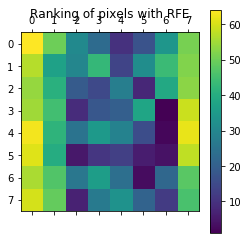

In [24]:
# 官网的RFE的例子
# ranking是每个像素点（特征）的排序
%matplotlib inline
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

Optimal number of features : 3


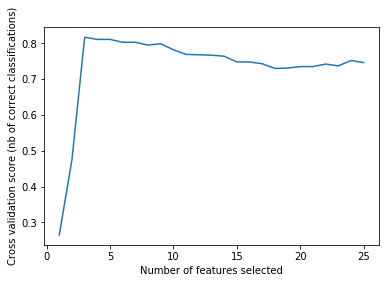

In [25]:
# rfe结合cross validation寻找最佳特征个数
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=3,
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Embedded

使用**SelectFromModel**模块选择特征 (Feature selection using SelectFromModel)

　　单变量特征选择方法独立的衡量每个特征与响应变量之间的关系，另一种主流的特征选择方法是基于机器学习模型的方法。*有些机器学习方法本身就具有对特征进行打分的机制，或者很容易将其运用到特征选择任务中，例如回归模型，SVM，决策树，随机森林等等*。其实Pearson相关系数等价于线性回归里的标准化回归系数。

　　SelectFromModel 作为meta-transformer，能够用于拟合后任何拥有coef_或feature_importances_ 属性的预测模型。 如果特征对应的coef_ 或 feature_importances_ 值低于设定的阈值threshold，那么这些特征将被移除。除了手动设置阈值，也可通过字符串参数调用内置的启发式算法(heuristics)来设置阈值，包括：平均值(“mean”), 中位数(“median”)以及他们与浮点数的乘积，如”0.1*mean”。

In [19]:
# 官网例子：在阈值未知的前提下，选择了Boston dataset中两项最重要的特征。
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
boston = load_boston()
X, y = boston['data'], boston['target']
print("boston feature num:", X.shape[1])

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]
    print(n_features)


boston feature num: 13
4
4
4
4
2


#### 基于惩罚项的特征选择法

使用L1范数作为惩罚项的线性模型(Linear models)会得到稀疏解：大部分特征对应的系数为0。当你希望减少特征的维度以用于其它分类器时，可以通过 feature_selection.SelectFromModel 来选择不为0的系数。特别指出，常用于此目的的稀疏预测模型有 
* linear_model.Lasso（回归） 
* linear_model.LogisticRegression
* svm.LinearSVC（分类）

对于SVM和逻辑回归，参数C控制稀疏性：C越小，被选中的特征越少。(C可以认为是正则化系数的倒数)
对于Lasso，参数alpha越大，被选中的特征越少。

使用带惩罚项的基模型，除了筛选出特征外，同时也进行了降维。使用feature_selection库的SelectFromModel类结合带L1惩罚项的逻辑回归模型

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
 
#带L1惩罚项的逻辑回归作为基模型的特征选择
data = SelectFromModel(LogisticRegression(penalty="l1", C=0.1),threshold=1.5)\
        .fit_transform(iris.data, iris.target)
data[:5]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4]])

**L1惩罚项降维的原理在于保留多个对目标值具有同等相关性的特征中的一个**，所以没选到的特征不代表不重要。故，可结合L2惩罚项来优化。具体操作为：若一个特征在L1中的权值为1，选择在L2中权值差别不大且在L1中权值为0的特征构成同类集合，将这一集合中的特征平分L1中的权值，故需要构建一个新的逻辑回归模型：

In [20]:
from sklearn.linear_model import LogisticRegression

class LR(LogisticRegression):
    def __init__(self, threshold=0.01, dual=False, tol=1e-4, C=1.0,
                 fit_intercept=True, intercept_scaling=1, class_weight=None,
                 random_state=None, solver='liblinear', max_iter=100,
                 multi_class='ovr', verbose=0, warm_start=False, n_jobs=1):

        #权值相近的阈值
        self.threshold = threshold
        LogisticRegression.__init__(self, penalty='l1', dual=dual, tol=tol, C=C,
                 fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, class_weight=class_weight,
                 random_state=random_state, solver=solver, max_iter=max_iter,
                 multi_class=multi_class, verbose=verbose, warm_start=warm_start, n_jobs=n_jobs)
        #使用同样的参数创建L2逻辑回归
        self.l2 = LogisticRegression(penalty='l2', dual=dual, tol=tol, C=C, fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, class_weight = class_weight, random_state=random_state, solver=solver, max_iter=max_iter, multi_class=multi_class, verbose=verbose, warm_start=warm_start, n_jobs=n_jobs)

    def fit(self, X, y, sample_weight=None):
        #训练L1逻辑回归
        super(LR, self).fit(X, y, sample_weight=sample_weight)
        self.coef_old_ = self.coef_.copy()
        #训练L2逻辑回归
        self.l2.fit(X, y, sample_weight=sample_weight)

        cntOfRow, cntOfCol = self.coef_.shape
        #权值系数矩阵的行数对应目标值的种类数目
        for i in range(cntOfRow):
            for j in range(cntOfCol):
                coef = self.coef_[i][j]
                #L1逻辑回归的权值系数不为0
                if coef != 0:
                    idx = [j]
                    #对应在L2逻辑回归中的权值系数
                    coef1 = self.l2.coef_[i][j]
                    for k in range(cntOfCol):
                        coef2 = self.l2.coef_[i][k]
                        #在L2逻辑回归中，权值系数之差小于设定的阈值，且在L1中对应的权值为0
                        if abs(coef1-coef2) < self.threshold and j != k and self.coef_[i][k] == 0:
                            idx.append(k)
                    #计算这一类特征的权值系数均值
                    mean = coef / len(idx)
                    self.coef_[i][idx] = mean
        return self

In [30]:
from sklearn.feature_selection import SelectFromModel

#带L1和L2惩罚项的逻辑回归作为基模型的特征选择
#参数threshold为权值系数之差的阈值
data = SelectFromModel(LR(threshold=0.5, C=0.1), threshold=1.5)\
        .fit_transform(iris.data, iris.target)
data[:5]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4]])

#### 基于树模型的特征选择法

基于树的预测模型（见 sklearn.tree 模块，森林见 sklearn.ensemble 模块）能够用来计算特征的重要程度，因此能用来去除不相关的特征

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
 
#GBDT作为基模型的特征选择
data = SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data, iris.target)
data[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# extraTree作为基模型的特征选择
data = SelectFromModel(ExtraTreesClassifier()).fit_transform(iris.data, iris.target)
data[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

### 降维

当特征选择完成后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时间长的问题，因此降低特征矩阵维度也是必不可少的。常见的降维方法除了以上提到的基于L1惩罚项的模型以外，另外还有主成分分析法（PCA）和线性判别分析（LDA），线性判别分析本身也是一个分类模型。PCA和LDA有很多的相似点，其本质是要将原始的样本映射到维度更低的样本空间中，但是PCA和LDA的映射目标不一样：
* PCA是为了让映射后的样本具有最大的发散性；
* 而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。


#### 主成分分析法（PCA）

In [63]:
from sklearn.decomposition import PCA

#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
data = PCA(n_components=2).fit_transform(iris.data)
data[:5]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

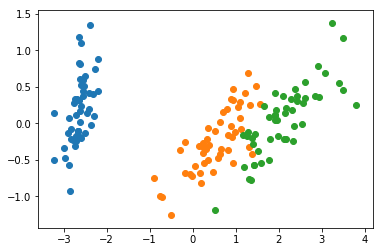

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

x = data[:,0]
y = data[:,1]
d = np.vstack([x,y,iris.target]).T

cc1 = d[np.where(d[:,2]==0)]
cc2 = d[np.where(d[:,2]==1)]
cc3 = d[np.where(d[:,2]==2)]

# cc1 
plt.scatter(cc1[:,0], cc1[:,1])
plt.scatter(cc2[:,0], cc2[:,1])
plt.scatter(cc3[:,0], cc3[:,1])
plt.show()

#### 线性判别分析法（LDA）

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#线性判别分析法，返回降维后的数据
#参数n_components为降维后的维数
data = LDA(n_components=2).fit_transform(iris.data, iris.target)
data[:5]

array([[-8.0849532 ,  0.32845422],
       [-7.1471629 , -0.75547326],
       [-7.51137789, -0.23807832],
       [-6.83767561, -0.64288476],
       [-8.15781367,  0.54063935]])

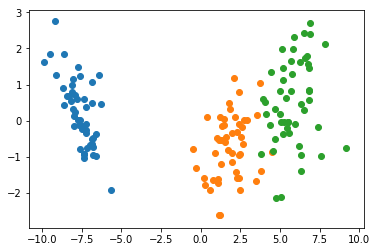

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

x = data[:,0]
y = data[:,1]
d = np.vstack([x,y,iris.target]).T

cc1 = d[np.where(d[:,2]==0)]
cc2 = d[np.where(d[:,2]==1)]
cc3 = d[np.where(d[:,2]==2)]

# cc1 
plt.scatter(cc1[:,0], cc1[:,1])
plt.scatter(cc2[:,0], cc2[:,1])
plt.scatter(cc3[:,0], cc3[:,1])
plt.show()